In [ ]:
'''
Setup for using pliers to extract faces from .mp4 files:
    1. Install pliers and necessary dependencies
    2. Ensure video files to be extracted from are in the correct folder (filepath currently hardcoded)
    
TODO:
    - Create function to auto populate file path?
    - Create function to auto detect video length (in s)?
    - Figure out what result_df is actually storing...
'''

In [ ]:
# If pliers + face_recognition not currently installed:
pip install pliers
pip install face_recognition

In [1]:
import imageio
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pliers
from os.path import join

from pliers.stimuli import VideoStim
from pliers.graph import Graph
from pliers.filters import FrameSamplingFilter
#from pliers.extractors import (FaceRecognitionFaceLocationsExtractor,
                               #FaceRecognitionFaceEncodingsExtractor,
                               #MicrosoftAPIFaceExtractor,
                               #GoogleVisionAPIFaceExtractor,
                               #merge_results)
from pliers.extractors import (FaceRecognitionFaceLocationsExtractor,
                               FaceRecognitionFaceEncodingsExtractor,
                               merge_results)

from pliers.converters import VideoToAudioConverter

In [2]:
# Save the video to be analyzed into a variable.
video = VideoStim(r'/home/jovyan/hackathon/visual-feature-decoding/extract_features/extract_faces/video_clips/Discussion Stock Footage - Discussion Free Stock Videos - Discussion No Copyright Videos (480p).mp4')
#    AHH: This is currently hardcoded to my jupyterhub file path where the video to analyze is saved.
#    Fix: create a function that will substitute the first part of the path string?

# This is sampling at the rate of 2 Hz (2 frames per sec). To downsample further, change hertz to 1 or 0.5. 
#    AHH: This step takes a while, but is quicker the more you downsample. 
sampler = FrameSamplingFilter(hertz=2)
frames = sampler.transform(video)

# Detect faces in selected frames
face_ext = FaceRecognitionFaceLocationsExtractor()
# face_ext = FaceRecognitionFaceEncodingsExtractor() # AHH - need to figure out how EncodingsExtractor differs from LocationsExtractor
face_result = face_ext.transform(frames)

Stim: 686it [03:31,  3.25it/s]


In [3]:
# AHH: Let's just look at the df...
result_df = [f.to_df() for f in face_result]

result_df = pd.concat(result_df)

result_df.head(10)

,order,duration,onset,object_id,face_locations
0,NaN,0.52,15.48,0,"(86, 364, 176, 275)"
1,NaN,0.52,15.48,1,"(106, 573, 196, 484)"
0,NaN,0.48,16.00,0,"(68, 354, 175, 247)"
1,NaN,0.48,16.00,1,"(92, 581, 199, 474)"
0,NaN,0.52,16.48,0,"(76, 344, 166, 255)"
1,NaN,0.52,16.48,1,"(92, 581, 199, 474)"
0,NaN,0.48,17.00,0,"(76, 344, 166, 255)"
1,NaN,0.48,17.00,1,"(92, 581, 199, 474)"
0,NaN,0.52,17.48,0,"(86, 335, 176, 245)"
1,NaN,0.52,17.48,1,"(106, 573, 196, 484)"


In [4]:
import numpy as np
# Set the range of time over which to plot extracted faces.
#     AHH: Again, this needs to be manually set currently. Maybe set the range automatically based on the number of frames given the sampling Hz...?
#     Total s = number of frames / Hz
time = np.arange(0,342,0.5)

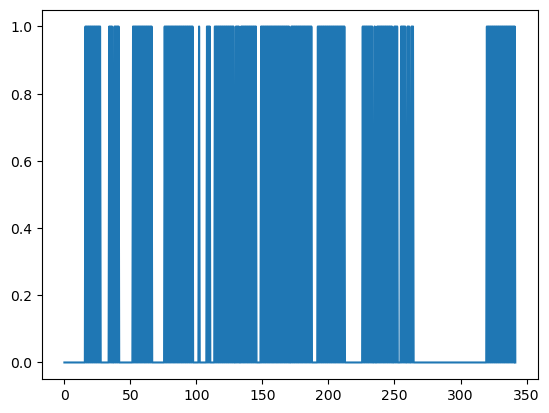

In [5]:
# AHH: I'm pretty sure all this is doing is plotting whether a face is present or not at each sampled frame.
# Plotting location or face_encoding could be more interesting!
plt.plot(time, [t in result_df["onset"].values for t in time])